(sec-czgate)=
# CZ Gate

Controlled Z (CZ) gate is one of controlled phase gates.  See discussed in {numref}`sec-cpgate`.  

## Definition

### Operational Definition

When gate CZ$_{q_0}^{q_1}$ acts on $|q_1\, q_0\rangle$, Z is applied to $q_1$ if $q_0=1$ and nothing is done otherwise. Qubit $q_0$ serves as control qubit and $q_1$ as target qubit. Mathematically, it is expressed as

$$
\text{CZ}_{q_0}^{q_1} \left(|q_1\rangle \otimes |q_0\rangle\right) = \left(Z^{q_0} |q_1\rangle\right) \otimes |q_0\rangle, \quad q_0, q_1 \in \{0,1\}
$$

Writing it explicitly, CZ transforms computational basis as follows:

$$
\begin{align}
\text{CZ}_{q_0}^{q_1} \lvert 00\rangle &= \lvert 00\rangle \\
\text{CZ}_{q_0}^{q_1} \lvert 01\rangle &= \lvert 01\rangle \\
\text{CZ}_{q_0}^{q_1} \lvert 10\rangle &= \lvert 10\rangle \\
\text{CZ}_{q_0}^{q_1} \lvert 11\rangle &= - \lvert 11\rangle 
\end{align}
$$

$$
\begin{align}
\text{CZ}_{q_1}^{q_0} \lvert 00\rangle &= \lvert 00\rangle \\
\text{CZ}_{q_1}^{q_0} \lvert 01\rangle &= \lvert 01\rangle \\
\text{CZ}_{q_1}^{q_0} \lvert 10\rangle &= \lvert 10\rangle \\
\text{CZ}_{q_1}^{q_0} \lvert 11\rangle &= - \lvert 11\rangle 
\end{align}
$$

### Operator expression

$$
\text{CZ}_{q_0}^{q_1} = \text{I} \otimes |0\rangle\langle 0| + \text{Z} \otimes |1\rangle\langle 1|
$$

$$
\text{CZ}_{q_1}^{q_0} = |0\rangle\langle 0| \otimes \text{I} + |1\rangle\langle 1| \otimes \text{Z}
$$

### Matrix representation

$$
\text{CZ}_{q_0}^{q_1} = \begin{bmatrix} 1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}
$$

$$
\text{CZ}_{q_1}^{q_0} = \begin{bmatrix} 1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}
$$

Notice that $\text{CZ}_{q_0}^{q_1} = \text{CZ}_{q_1}^{q_0}$.  This is a kind of phase kickback discussed in {numref}`sec-cxgate`. Hence, it is not necessary to specify the control and target qubits.

The Qiskit circuit code symbol `cz` and it appears as follows.  Notice that $\text{CZ}_{q_0}^{q_1}$ and $\text{CZ}_{q_1}^{q_0}$ have the same diagram.

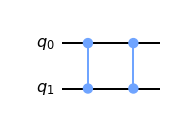

In [2]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(2)

# CZ_{q0,q1}
qc.cz(0,1)
# CZ_{q1,q0}
qc.cz(1,0)

qc.draw('mpl')

### Acting on superposition state

Unless needed, we omit the control and target qubits.

CZ flips the phase of $|11\rangle$.

$$
\text{CZ} \left (c_{00} |00\rangle + c_{01} |01\rangle + c_{10} |10\rangle + c_{11} |11\rangle \right ) =
c_{00} |00\rangle + c_{01} |01\rangle + c_{10} |10\rangle - c_{11} |11\rangle
$$

A simple application is to transform Bell states, CZ$|\Phi^{\pm}\rangle = \Phi^{\mp}\rangle$.  Notice that CZ does not affect the other Bell states $|\Psi^{\pm}\rangle$.  See applications in {numref}`sec-teleportation` and {numref}`sec-entanglement-swap`.

## Relation with CX

Recalling that X = H $\cdot$ Z $\cdot$ H,

$$
\text{CX}_{q_0}^{q_1} = \left(\text{H} \otimes \text{I}\right) \cdot \text{CZ} \cdot  \left(\text{H} \otimes \text{I}\right)
$$

$$
\text{CX}_{q_1}^{q_0} = \left(\text{I} \otimes \text{H}  \right) \cdot \text{CZ} \cdot  \left( \text{I} \otimes \text{H} \right)
$$

Further recalling that H$^2$=H,the inverse of the above relations are

$$
\text{CZ} = \left(\text{H} \otimes \text{I}\right) \cdot \text{CX}_{q_0}^{q_1} \cdot  \left(\text{H} \otimes \text{I}\right)
= \left(\text{I} \otimes \text{H}  \right) \cdot \text{CX}_{q_1}^{q_0} \cdot  \left( \text{I} \otimes \text{H} \right)
$$


## An Physical Implementation of CZ

Recall that gates are unitary transformation determined by Schr&ouml;dinger equation, $U=e^{-i H t}$.  All controlled gates require intertaction between two qubits. To realize the CZ gate, we consider the Ising interaction between them.  Adding also the local potentials, the Hamiltonian can be written as

$$
H = I - \sigma_z \otimes I - I \otimes \sigma_z + \sigma_z \otimes \sigma_z 
$$

The time evolution over period $\tau=\frac{\pi}{4}$ leads to

$$
U = e^{-i\frac{\pi}{4} H } = e^{-i \frac{\pi}{4}} \left(e^{i  \frac{\pi}{4}\sigma_z} \otimes e^{i  \frac{\pi}{4}\sigma_z}\right) \cdot e^{-i \frac{\pi}{4} \sigma_z \otimes \sigma_z} \doteq \begin{bmatrix} 1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}
$$

We find the Ising interaction between a pair of qubits  can realize the CZ gate. 